<strong><h1><center><span style="color: blue">Project Proposal</span></center></h1></strong>
<center>Revna Altınöz 150220756</center>
<center>Furkan Yasir Göksu 150230723</center>
<center>Pınar Erçin 150210336</center>

# <center><strong><span style="color:blue">Project Team: </span></strong>PaRaF Team</center>

# <center><strong><span style="color:blue">Title: </span></strong>HEALTH STATUS AND EXPENDITURES</center>

<h1><center><strong><span style="color:blue">Problem Definition: </center></h1>
<center></span></strong> Due to the varying nature of healthcare expenditures, it is essential to understand their intricate relationships with crucial health indicators, including the number of hospitals per province, overall obesity rates, hospital bed capacities, social assistance programs, and the general health status of individuals. The analysis will provide insights into the effectiveness of healthcare spending, regional variations in health indicators, and the overall health and well-being of the population. </center>

<h1><center><strong><span style="color:blue">Dataset(s) Sources: </span></strong></center></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import geopandas as gp
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

## Our first dataset:

In [2]:
expenditures = pd.read_excel('saglik harcamalari ile ilgili gostergeler.xls')
expenditures.head()

,"Sağlık harcamaları ile ilgili göstergeler, 1999-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,"Indicators on health expenditures, 1999-2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1999.0,2000.0,2001,2002.00,2003.00,2004.000000,2005.00000,2006.000000,2007.00000,...,2013.000000,2014.000000,2015.000000,2016.000000,2017.00000,2018.000000,2019.000000,2020,2021.000000,2022.000000
3,Toplam sağlık harcaması (Milyon TL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total health expenditure (Million TRY),4985.0,8248.0,12395.88,18773.94,24278.91,30020.845725,35358.90747,44068.681063,50904.30093,...,84390.091225,94749.507368,104567.539233,119755.779937,140647.34881,165234.039317,201030.592165,249931.858654,353940.966576,606835.228154


In [3]:
# Define the `years_index` variable to determine columns
target_row_index = 2
expenditures.columns = expenditures.iloc[target_row_index]

# Retrieve rows after the `target_row_index` and drop any missing values
expenditures = expenditures.iloc[target_row_index + 1:]
expenditures = expenditures.dropna()

# Obtain the updated `expenditures` DataFrame after the operations
expenditures


2,NaN,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
4,Total health expenditure (Million TRY),4985.0,8248.0,12395.88,18773.94,24278.91,30020.845725,35358.90747,44068.681063,50904.30093,...,84390.091225,94749.507368,104567.539233,119755.779937,140647.34881,165234.039317,201030.592165,249931.858654,353940.966576,606835.228154
7,Health expenditure per capita (TRY),79.0,128.0,190,284.00,363.00,444.000000,517.00000,636.000000,726.00000,...,1108.000000,1228.000000,1337.000000,1511.000000,1751.00000,2030.000000,2434.000000,2997,4206.000000,7141.000000


Our first dataset includes Health Expenditures between 1999 – 2022 years. This dataset is our main dataset to investigate the relation between others. The column headers are set based on the third row (row including years) of the dataset, and rows preceding this target row are dropped to eliminate unnecessary information. The DataFrame is then filtered to remove rows with NaN values.

In [4]:
columns = [int(col) if pd.notna(col) else col for col in expenditures.columns]
expenditures.columns = ['Expenditures'] + columns[1:]
expenditures = expenditures[expenditures["Expenditures"] == "Total health expenditure (Million TRY)"]

expenditures

,Expenditures,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4,Total health expenditure (Million TRY),4985.0,8248.0,12395.88,18773.94,24278.91,30020.845725,35358.90747,44068.681063,50904.30093,...,84390.091225,94749.507368,104567.539233,119755.779937,140647.34881,165234.039317,201030.592165,249931.858654,353940.966576,606835.228154


Additionally, the code applies a transformation to convert numerical values with decimals to integers for consistency. The column names are modified to ensure clarity and consistency, with the first column renamed as 'Expenditures.

## Our second dataset:

In [5]:
healthcare = pd.read_excel('sosyal_yardm.xls')
healthcare

,"Ayni ve nakdi sosyal koruma yardımlarının risk/ihtiyaç gruplarına göre dağılımı, 2000-2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,Distribution of cash and in kind social protec...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(Milyon TL- Million TRY)
2,NaN,NaN,Nakdi yardımlar\nCash benefits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2000,2001.000000,2002.000000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020(r),2021
4,Sosyal koruma yardımları toplamı,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Total social protection benefits,NaN,7558.409299,11763.398537,18350.796838,28118.596365,36613.279668,43767.523771,51810.620453,61797.328416,...,68897.196245,75570.005094,84044.123711,92498.290931,107583.767494,122406.690772,142948.458534,171821.038245,195425.858689,273005.813498
6,NaN,Hastalık/sağlık bakımı,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Sickness/health care,74.44108,115.190728,168.978380,233.433253,303.618116,340.075046,323.210881,512.199726,...,59630.580435,64684.452947,71949.129194,78801.431643,89388.267139,100913.913614,119224.118051,143027.617541,165964.73923,235662.767864
8,NaN,Engelli/malul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Disability,346.570101,501.634844,752.849231,970.658708,1175.697212,1378.001944,1646.546137,2124.088956,...,3611.440784,4096.527706,4720.116470,5129.890247,6018.703111,6912.840929,8143.615391,10002.192818,11443.593505,13345.600099


In [6]:
# Selecting the first 24 columns of the healthcare DataFrame
healthcare_show = healthcare.iloc[:, :24]

# Selecting specific rows (index 3 and index 7) from the subset of columns (first 24 columns)
healthcare_show = healthcare_show.iloc[[3, 7]]

# Displaying the resulting subset of the DataFrame
healthcare_show

,"Ayni ve nakdi sosyal koruma yardımlarının risk/ihtiyaç gruplarına göre dağılımı, 2000-2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
3,NaN,NaN,2000,2001.000000,2002.00000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,...,2012.00000,2013.000000,2014.000000,2015.000000,2016.00000,2017.000000,2018.000000,2019.000000,2020(r),2021.00
7,NaN,Sickness/health care,74.44108,115.190728,168.97838,233.433253,303.618116,340.075046,323.210881,512.199726,...,887.88465,1154.396284,1372.622644,1661.463548,1941.50116,2163.460787,2530.998635,3008.043603,5302.4149,6472.99


In [7]:
# Define the index for the year
target_row_index = 3

# Set DataFrame columns to the values in the row at 'year_index'
healthcare.columns = healthcare.iloc[target_row_index]

# Select rows after 'target_row_index' and retain only the first 24 columns
healthcare = healthcare.iloc[target_row_index + 1:]
selected_rows_and_columns = healthcare.iloc[:, :24]

# Select the 4th row after filtering and drop any columns with NaN values
healthcare_last = selected_rows_and_columns.iloc[[3]]
healthcare_last = healthcare_last.dropna(axis=1)

# Display the resulting DataFrame with the last operations applied
healthcare_last

3,NaN,2000,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020(r),2021.0
7,Sickness/health care,74.44108,115.190728,168.97838,233.433253,303.618116,340.075046,323.210881,512.199726,484.095404,...,887.88465,1154.396284,1372.622644,1661.463548,1941.50116,2163.460787,2530.998635,3008.043603,5302.4149,6472.99


In [8]:
# Rename the '2020(r)' column to '2020'
healthcare_last.rename(columns={'2020(r)': '2020'}, inplace=True)

# Convert column names to integers where possible, preserving NaN values
columns = [int(col) if pd.notna(col) else col for col in healthcare_last.columns]

# Assign the modified column names back to the DataFrame, preserving the first column name
healthcare_last.columns = ['Health\Years'] + columns[1:]
healthcare_last

,Health\Years,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
7,Sickness/health care,74.44108,115.190728,168.97838,233.433253,303.618116,340.075046,323.210881,512.199726,484.095404,...,887.88465,1154.396284,1372.622644,1661.463548,1941.50116,2163.460787,2530.998635,3008.043603,5302.4149,6472.99


The dataset above includes Social Health for Sickness/Healthcare between 2000 – 2021 years. We only used this row in this dataset. Rows preceding this target row are dropped to eliminate unnecessary information. Any columns with NaN values are removed, and the column names are modified for clarity and consistency.

In [9]:
# Drop the 'Health\\Years' column
healthcare_last = healthcare_last.drop("Health\Years", axis=1)

# Transpose the DataFrame
healthcare_last = healthcare_last.T

# Create a new 'Years' column with values from 2000 to 2021
healthcare_last["Years"] = np.array(range(2000,2022))

# Rename a specific column (column index 7) to 'Status'
healthcare_last.rename(columns={7: 'Status'}, inplace=True)

# Reset the index of the DataFrame
healthcare_last = healthcare_last.reset_index(drop=True)


## Our third dataset:

In [10]:
body_mass = pd.read_excel('obezite verisi.xls')
body_mass

,Yıl ve cinsiyet\nYear and sex,Unnamed: 1,Toplam\nTotal,Düşük kilolu\nUnderweight,Normal kilolu\nNormal weight,Obez öncesi\nPre-obese,Obez\nObese
0,2008.0,Toplam-Total,"100,0",4.200000,48.200000,32.400000,15.200000
1,NaN,Erkek-Male,"100,0",2.700000,48.100000,36.900000,12.300000
2,NaN,Kadın-Female,"100,0",5.900000,48.200000,27.400000,18.500000
3,2010.0,Toplam-Total,99.99,4.650000,45.450000,32.980000,16.910000
4,NaN,Erkek-Male,100,3.460000,46.120000,37.260000,13.160000
5,NaN,Kadın-Female,100,5.930000,44.730000,28.390000,20.950000
6,2012.0,Toplam-Total,99.99,3.860000,44.150000,34.760000,17.230000
7,NaN,Erkek-Male,100,2.650000,44.650000,38.980000,13.720000
8,NaN,Kadın-Female,100,5.130000,43.620000,30.350000,20.900000
9,2014.0,Toplam-Total,100,4.190000,42.180000,33.710000,19.920000


In [11]:
body_mass = body_mass.dropna()
body_mass = body_mass.round(1)
body_mass

,Yıl ve cinsiyet\nYear and sex,Unnamed: 1,Toplam\nTotal,Düşük kilolu\nUnderweight,Normal kilolu\nNormal weight,Obez öncesi\nPre-obese,Obez\nObese
0,2008.0,Toplam-Total,"100,0",4.2,48.2,32.4,15.2
3,2010.0,Toplam-Total,99.99,4.6,45.4,33.0,16.9
6,2012.0,Toplam-Total,99.99,3.9,44.2,34.8,17.2
9,2014.0,Toplam-Total,100,4.2,42.2,33.7,19.9
12,2016.0,Toplam-Total,100,4.0,42.1,34.3,19.6
15,2019.0,Toplam-Total,100,3.8,40.1,35.0,21.1
18,2022.0,Toplam-Total,100,3.6,40.6,35.6,20.2


In [12]:
# Define the target header and columns to be removed
target_header = 'Toplam\nTotal'
columns_to_remove = ['Unnamed: 1', 'Toplam\nTotal']

# Get the column indexes of columns to be removed
indexes_to_remove = [body_mass.columns.get_loc(col) for col in columns_to_remove if col in body_mass.columns]

# Drop columns from the DataFrame based on their indexes
body_mass = body_mass.drop(body_mass.columns[indexes_to_remove], axis=1)

body_mass

,Yıl ve cinsiyet\nYear and sex,Düşük kilolu\nUnderweight,Normal kilolu\nNormal weight,Obez öncesi\nPre-obese,Obez\nObese
0,2008.0,4.2,48.2,32.4,15.2
3,2010.0,4.6,45.4,33.0,16.9
6,2012.0,3.9,44.2,34.8,17.2
9,2014.0,4.2,42.2,33.7,19.9
12,2016.0,4.0,42.1,34.3,19.6
15,2019.0,3.8,40.1,35.0,21.1
18,2022.0,3.6,40.6,35.6,20.2


The dataset above includes Obesity Data between 2008 – 2022 years. We used this data to check if the health expenditures affect the health status in terms of body mass index. Although male and female data were given separately, we looked at the total result.

In [13]:
body_mass['Yıl ve cinsiyet\nYear and sex'] = body_mass['Yıl ve cinsiyet\nYear and sex'].astype(int)
body_mass.rename(columns={'Yıl ve cinsiyet\nYear and sex': 'Years'}, inplace=True)
body_mass.rename(columns={'Düşük kilolu\nUnderweight': 'Underweight'}, inplace=True)
body_mass.rename(columns={'Normal kilolu\nNormal weight': 'Normal weight'}, inplace=True)
body_mass.rename(columns={'Obez öncesi\nPre-obese': 'Pre-obese'}, inplace=True)
body_mass.rename(columns={'Obez\nObese': 'Obese'}, inplace=True)
body_mass = body_mass.set_index('Years').transpose()

body_mass

Years,2008,2010,2012,2014,2016,2019,2022
Underweight,4.2,4.6,3.9,4.2,4.0,3.8,3.6
Normal weight,48.2,45.4,44.2,42.2,42.1,40.1,40.6
Pre-obese,32.4,33.0,34.8,33.7,34.3,35.0,35.6
Obese,15.2,16.9,17.2,19.9,19.6,21.1,20.2


We translated column names from Turkish to English, converted the 'Years' column to integers, and transposed the DataFrame for better analysis, resulting in a more structured and readable dataset.

## Our fourth dataset:


In [14]:
# Read the Excel file into a DataFrame
df1 = pd.read_excel('hastane_yatak_says.xls')

# Concatenate specific row ranges to create a new DataFrame
concatenated_df = pd.concat([df1.iloc[5:7, :], df1.iloc[7:62, :]], ignore_index=True)

# Drop columns with NaN values
df = concatenated_df.dropna(axis=1)

# Combine two rows to create a new row
combined_row = df.iloc[0].astype(str) + '' + df.iloc[1].astype(str)

# Clean up sentences in the combined row
corrected_sentences = []
for index, sentence in combined_row.items():
    corrected_sentence = ' '.join(sentence.split())
    corrected_sentences.append(corrected_sentence)

# Create a DataFrame with corrected sentences
combined_row = pd.concat([combined_row, pd.DataFrame(corrected_sentences, columns=['0'])], axis=1)
combined_row.columns = ["0", "1"]
combined_row = combined_row.drop("0", axis=1)
combined_row = combined_row.dropna(axis=0)

# Remove two rows from the DataFrame
# df = df.drop([1, 2])

# Add the newly created row to the DataFrame
df.columns = combined_row["1"]
df = df.drop([0, 1])
df = df.reset_index()
df = df.drop("index", axis=1)
df = df.rename(columns={'Yıllar Years': 'Years'})

# Define a function to convert values to integers
def convert_to_int(value):
    try:
        return int(value)
    except:
        print(value)
        return value

# Convert "Years" column to integers
df["Years"] = df["Years"].apply(convert_to_int)
df['Years'] = df['Years'].replace('2017(r)', 2017)
df['Number of outpatient medical institutions(1)'] = df['Number of outpatient medical institutions(1)'].replace('-', 0)

#This is extra dataframe we use it later.
hospitalnumber = df[["Years", "Total number of medical institutions"]]
df


2017(r)


1,Years,Total number of medical institutions,Number of inpatient medical institutions,Number of outpatient medical institutions(1),Total number of hospital beds,Number of hospital beds per 1000 population
0,1967,664,664,0,59173,1.81
1,1968,681,681,0,64966,1.93
2,1969,725,725,0,69224,2.01
3,1970,743,743,0,71486,2.02
4,1971,759,759,0,74556,2.06
5,1972,778,778,0,77372,2.08
6,1973,790,790,0,81075,2.13
7,1974,796,796,0,83458,2.14
8,1975,798,798,0,81264,2.03
9,1976,790,790,0,82945,2.03


The dataset above includes The Number of Beds in Hospitals, Total number of medical institutions (headers that we use) between 1967 – 2021 years. The DataFrame is cleaned by dropping unnecessary columns with NaN values, combining two rows into a single row to have proper column headers, and removing the original rows Redundant rows are removed to create a more organized and structured dataset. 

## Our fifth dataset: 

In [15]:
df = pd.read_excel('bireylerin genel saglik durumunun cinsiyet ve yas grubuna gore dagilimi.xls')

# Select the column "Yaş grubu/"
features = df["Yaş grubu/"]

# Drop rows not containing "Total"
dropValues = []
temp = df[:].T.values
count = 0
for i in temp:
    if "Total" not in i:
        dropValues.append(count)
    count += 1

# Reset column names to start from index 0
df.columns = range(len(df.columns))

# Drop identified rows
df = df.drop(dropValues, axis=1)

df


,2,6,10,14,18,22,26
0,2008,2010,2012,2014,2016,2019,2022
1,Toplam,Toplam,Toplam,Toplam,Toplam,Toplam,Toplam
2,Total,Total,Total,Total,Total,Total,Total
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63.558859,64.944515,70.695846,61.209135,63.545131,60.894945,63.426429
5,10.139912,9.957522,7.224874,11.480119,10.690481,10.425135,8.087863
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,85.882503,84.925497,92.478169,85.751447,89.533237,86.082044,87.201652
8,2.268091,2.490049,1.35741,2.232231,2.284011,1.452639,1.809318
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Merge "Yaş grubu/" column with other columns
df = pd.concat([features, df], axis=1)

# Drop all rows with NaN values
df = df.dropna(how="all")
df

,Yaş grubu/,2,6,10,14,18,22,26
0,Sağlık durumu,2008,2010,2012,2014,2016,2019,2022
1,Age group/,Toplam,Toplam,Toplam,Toplam,Toplam,Toplam,Toplam
2,Health status,Total,Total,Total,Total,Total,Total,Total
3,Toplam - Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Çok iyi/İyi\nVery good/Good,63.558859,64.944515,70.695846,61.209135,63.545131,60.894945,63.426429
5,Kötü/Çok kötü\nBad/Very bad,10.139912,9.957522,7.224874,11.480119,10.690481,10.425135,8.087863
6,15-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Çok iyi/İyi\nVery good/Good,85.882503,84.925497,92.478169,85.751447,89.533237,86.082044,87.201652
8,Kötü/Çok kötü\nBad/Very bad,2.268091,2.490049,1.35741,2.232231,2.284011,1.452639,1.809318
9,25-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Drop rows containing "Kötü/Çok"
df = df[~df['Yaş grubu/'].str.contains('Kötü/Çok')]

# Fill NaN values with the next available value
df = df.fillna(method="bfill")
df

,Yaş grubu/,2,6,10,14,18,22,26
0,Sağlık durumu,2008,2010,2012,2014,2016,2019,2022
1,Age group/,Toplam,Toplam,Toplam,Toplam,Toplam,Toplam,Toplam
2,Health status,Total,Total,Total,Total,Total,Total,Total
3,Toplam - Total,63.558859,64.944515,70.695846,61.209135,63.545131,60.894945,63.426429
4,Çok iyi/İyi\nVery good/Good,63.558859,64.944515,70.695846,61.209135,63.545131,60.894945,63.426429
6,15-24,85.882503,84.925497,92.478169,85.751447,89.533237,86.082044,87.201652
7,Çok iyi/İyi\nVery good/Good,85.882503,84.925497,92.478169,85.751447,89.533237,86.082044,87.201652
9,25-34,75.901548,80.545748,85.296996,76.667881,81.075248,79.774367,81.126461
11,Çok iyi/İyi\nVery good/Good,75.901548,80.545748,85.296996,76.667881,81.075248,79.774367,81.126461
14,35-44,63.265173,65.212058,73.682511,62.534223,66.958897,65.985747,69.676422


In [18]:
# Assign the first row as column names
df.columns = df.iloc[0]

# Drop the first row and the row below it
df = df.iloc[2:]
df

,Sağlık durumu,2008,2010,2012,2014,2016,2019,2022
2,Health status,Total,Total,Total,Total,Total,Total,Total
3,Toplam - Total,63.558859,64.944515,70.695846,61.209135,63.545131,60.894945,63.426429
4,Çok iyi/İyi\nVery good/Good,63.558859,64.944515,70.695846,61.209135,63.545131,60.894945,63.426429
6,15-24,85.882503,84.925497,92.478169,85.751447,89.533237,86.082044,87.201652
7,Çok iyi/İyi\nVery good/Good,85.882503,84.925497,92.478169,85.751447,89.533237,86.082044,87.201652
9,25-34,75.901548,80.545748,85.296996,76.667881,81.075248,79.774367,81.126461
11,Çok iyi/İyi\nVery good/Good,75.901548,80.545748,85.296996,76.667881,81.075248,79.774367,81.126461
14,35-44,63.265173,65.212058,73.682511,62.534223,66.958897,65.985747,69.676422
16,Çok iyi/İyi\nVery good/Good,63.265173,65.212058,73.682511,62.534223,66.958897,65.985747,69.676422
19,45-54,51.782979,53.840895,60.473288,47.833804,49.201874,48.850269,55.402543


In [19]:
# Get the name of the first column
title = df.columns[0]

# Create a list of specified age groups
age_groups = ['15-24', '25-34', '35-44', '45-54', '55-64', '75+']

# Select rows with specified age groups
df = df[df[title].isin(age_groups)]
df

,Sağlık durumu,2008,2010,2012,2014,2016,2019,2022
6,15-24,85.882503,84.925497,92.478169,85.751447,89.533237,86.082044,87.201652
9,25-34,75.901548,80.545748,85.296996,76.667881,81.075248,79.774367,81.126461
14,35-44,63.265173,65.212058,73.682511,62.534223,66.958897,65.985747,69.676422
19,45-54,51.782979,53.840895,60.473288,47.833804,49.201874,48.850269,55.402543
23,55-64,38.294831,40.113756,45.408718,38.229355,40.725837,38.388261,42.879847
30,75+,21.837342,17.457172,17.911589,17.899089,14.025103,14.824537,17.202585


In [20]:
# Rename the first column to "Ages"
df = df.rename(columns={title: "Ages"})

# Convert columns except the first one to float
columns_to_convert = df.columns[1:]
df[columns_to_convert] = df[columns_to_convert].astype(float)
df=df.reset_index(drop=True)
health_with_ages = df
health_with_ages

,Ages,2008,2010,2012,2014,2016,2019,2022
0,15-24,85.882503,84.925497,92.478169,85.751447,89.533237,86.082044,87.201652
1,25-34,75.901548,80.545748,85.296996,76.667881,81.075248,79.774367,81.126461
2,35-44,63.265173,65.212058,73.682511,62.534223,66.958897,65.985747,69.676422
3,45-54,51.782979,53.840895,60.473288,47.833804,49.201874,48.850269,55.402543
4,55-64,38.294831,40.113756,45.408718,38.229355,40.725837,38.388261,42.879847
5,75+,21.837342,17.457172,17.911589,17.899089,14.025103,14.824537,17.202585


We edited the column names. We took only ages and health levels without making gender distinctions. We cropped the dataframe by taking the degree of "Very Good" levels in each year. Finally, we converted the data in the Dataframe to float type, thus obtaining a more structured and readable data set.

## Our sixth dataset:

In [21]:
# Read data from Excel file
hospital_cities = pd.read_excel('ili_l_hasatane.xls')
df

,Ages,2008,2010,2012,2014,2016,2019,2022
0,15-24,85.882503,84.925497,92.478169,85.751447,89.533237,86.082044,87.201652
1,25-34,75.901548,80.545748,85.296996,76.667881,81.075248,79.774367,81.126461
2,35-44,63.265173,65.212058,73.682511,62.534223,66.958897,65.985747,69.676422
3,45-54,51.782979,53.840895,60.473288,47.833804,49.201874,48.850269,55.402543
4,55-64,38.294831,40.113756,45.408718,38.229355,40.725837,38.388261,42.879847
5,75+,21.837342,17.457172,17.911589,17.899089,14.025103,14.824537,17.202585


In [22]:
# Select rows where the column "Hastane sayılarının illere göre dağılımı, 2002-2021" is equal to "İller - Provinces"
years = hospital_cities[hospital_cities["Hastane sayılarının illere göre dağılımı, 2002-2021"] == "İller - Provinces"]

# Drop NaN values along columns and the specified column
years = years.dropna(axis=1)
years = years.drop("Hastane sayılarının illere göre dağılımı, 2002-2021", axis=1)
# Convert the data to numpy array and then to a list for years
years = np.array(years)
years = list(years[0])
years

[2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [23]:
# Fill NaN values in the specified column with the forward-fill method
hospital_cities["Hastane sayılarının illere göre dağılımı, 2002-2021"] = hospital_cities["Hastane sayılarının illere göre dağılımı, 2002-2021"].fillna(method='ffill')

# Assign new column names to the DataFrame
hospital_cities.columns = ["Cities"] + ["Ministry"] + years

hospital_cities

,Cities,Ministry,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Distribution of number of hospitals by provinc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Distribution of number of hospitals by provinc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,İller - Provinces,NaN,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
3,İller - Provinces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Türkiye - Turkey,NaN,1156,1174,1217,1196,1203,1317,1350,1389,...,1483,1517,1528,1533,1510,1518,1534,1538,1534,1547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2016 yılında MSB’ye bağlı hastaneler Sağlık Ba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,"(1) 2002-2015 periods, ""Other"" is defined as t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,Hospitals affiliated to MoND were transferred ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,- Bilgi yoktur.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Drop rows with NaN values
hospital_cities = hospital_cities.dropna()

# Replace '-' with 0
hospital_cities = hospital_cities.replace("-", 0)
hospital_cities

,Cities,Ministry,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
5,Türkiye - Turkey,Sağlık Bakanlığı - Ministry of Health,774,789,829,793,767,848,847,834,...,832,854,866,865,876,879,889,895,900,908
6,Türkiye - Turkey,Üniversite - University,50,50,52,53,56,56,57,59,...,65,69,69,70,69,68,68,68,68,68
7,Türkiye - Turkey,Özel - Private,271,274,278,293,331,365,400,450,...,541,550,556,562,565,571,577,575,566,571
8,Türkiye - Turkey,Diğer (1) - Other (1),61,61,58,57,49,48,46,46,...,45,44,37,36,0,0,0,0,0,0
11,Adana,Sağlık Bakanlığı - Ministry of Health,11,14,14,15,14,13,12,12,...,11,11,12,12,12,13,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Osmaniye,Diğer (1) - Other (1),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491,Düzce,Sağlık Bakanlığı - Ministry of Health,3,3,4,3,2,2,2,2,...,2,3,6,6,6,6,6,6,6,7
492,Düzce,Üniversite - University,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
493,Düzce,Özel - Private,1,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [25]:
# Select rows where the "Ministry" column is "Sağlık Bakanlığı - Ministry of Health"
hospital_cities = hospital_cities[hospital_cities["Ministry"] == "Sağlık Bakanlığı - Ministry of Health"]
# Exclude the row with "Türkiye - Turkey" from the DataFrame
hospital_cities = hospital_cities[hospital_cities["Cities"] != "Türkiye - Turkey"]

# Sort values by 'Cities' column
hospital_cities = hospital_cities.sort_values(by='Cities')

# Reset the index
hospital_cities = hospital_cities.reset_index(drop=True)
hospital_cities


,Cities,Ministry,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Adana,Sağlık Bakanlığı - Ministry of Health,11,14,14,15,14,13,12,12,...,11,11,12,12,12,13,14,14,14,14
1,Adıyaman,Sağlık Bakanlığı - Ministry of Health,7,7,7,7,7,8,8,8,...,8,8,9,10,10,10,10,10,10,10
2,Afyonkarahisar,Sağlık Bakanlığı - Ministry of Health,17,16,16,16,16,16,15,15,...,17,17,19,18,18,18,18,18,18,18
3,Aksaray,Sağlık Bakanlığı - Ministry of Health,8,9,10,10,10,10,9,9,...,7,7,7,7,7,7,7,7,7,7
4,Amasya,Sağlık Bakanlığı - Ministry of Health,7,7,7,6,6,6,6,5,...,6,6,6,6,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Çorum,Sağlık Bakanlığı - Ministry of Health,14,15,15,15,15,15,13,14,...,14,14,14,14,14,14,14,14,14,14
77,İstanbul,Sağlık Bakanlığı - Ministry of Health,44,45,48,50,51,52,53,52,...,52,55,57,55,56,54,53,54,54,54
78,İzmir,Sağlık Bakanlığı - Ministry of Health,25,25,29,26,26,26,26,29,...,27,29,28,28,28,28,28,29,28,29
79,Şanlıurfa,Sağlık Bakanlığı - Ministry of Health,11,11,12,12,12,13,13,14,...,14,14,14,14,13,13,13,13,13,13


In [26]:
#Change the data type of the columns with names in the 'years' list to int
for col in years:
    if col in hospital_cities.columns:
        hospital_cities[col] = hospital_cities[col].astype(int)
        
hospital_cities

,Cities,Ministry,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Adana,Sağlık Bakanlığı - Ministry of Health,11,14,14,15,14,13,12,12,...,11,11,12,12,12,13,14,14,14,14
1,Adıyaman,Sağlık Bakanlığı - Ministry of Health,7,7,7,7,7,8,8,8,...,8,8,9,10,10,10,10,10,10,10
2,Afyonkarahisar,Sağlık Bakanlığı - Ministry of Health,17,16,16,16,16,16,15,15,...,17,17,19,18,18,18,18,18,18,18
3,Aksaray,Sağlık Bakanlığı - Ministry of Health,8,9,10,10,10,10,9,9,...,7,7,7,7,7,7,7,7,7,7
4,Amasya,Sağlık Bakanlığı - Ministry of Health,7,7,7,6,6,6,6,5,...,6,6,6,6,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Çorum,Sağlık Bakanlığı - Ministry of Health,14,15,15,15,15,15,13,14,...,14,14,14,14,14,14,14,14,14,14
77,İstanbul,Sağlık Bakanlığı - Ministry of Health,44,45,48,50,51,52,53,52,...,52,55,57,55,56,54,53,54,54,54
78,İzmir,Sağlık Bakanlığı - Ministry of Health,25,25,29,26,26,26,26,29,...,27,29,28,28,28,28,28,29,28,29
79,Şanlıurfa,Sağlık Bakanlığı - Ministry of Health,11,11,12,12,12,13,13,14,...,14,14,14,14,13,13,13,13,13,13


In [27]:
# Calculate the difference between 2021 and 2002 hospital numbers
result_hospital = hospital_cities.loc[:, 2021] - hospital_cities.loc[:, 2002]
result_hospital

0      3
1      3
2      1
3     -1
4      0
      ..
76     0
77    10
78     4
79     2
80     3
Length: 81, dtype: int32

In [28]:
# Create a new DataFrame with cities and hospital number differences
result_cities = hospital_cities["Cities"]
result_changes = pd.concat([result_cities, result_hospital], axis=1)
result_changes.reset_index(drop=True)
hospital_difference = result_changes
hospital_difference = hospital_difference.rename(columns={0: "Difference"})


# Sort the DataFrame by the 'Difference' column in descending order
hospital_difference = hospital_difference.sort_values(by='Difference', ascending=False)

# Get the top 5 rows with the highest 'Difference'
top5 = hospital_difference.head(5)

# Get the bottom 5 rows with the lowest 'Difference'
lowest5 = hospital_difference.tail(5)

hospital_difference

,Cities,Difference
22,Diyarbakır,10
77,İstanbul,10
27,Erzurum,9
9,Aydın,6
29,Gaziantep,5
...,...,...
48,Kırşehir,-2
50,Manisa,-2
46,Kırklareli,-2
47,Kırıkkale,-2


We edited the column names. We only took data from the Ministry of Health because we accepted that expenditures in the field of health are made by the state. We assigned this difference as the change in the number of hospitals as the difference between the number of hospitals in the provinces in 2021 and the number of hospitals in 2002. Then, using this data, we will obtain the change in the number of hospitals between these years from city to city. Finally, we converted the data in the Dataframe to int type, thus obtaining a more structured and readable data set.

In [29]:
import geopandas as gp

# Read the countries data from the geojson file
countries = gp.read_file("countries.geojson")

# Read the shapefile data for Turkey
turkey_geo = gp.read_file('TUR_adm\TUR_adm1.shp')

countries

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."
...,...,...,...
250,Samoa,WSM,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564..."
251,Yemen,YEM,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12..."
252,South Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -..."
253,Zambia,ZMB,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619..."


In [30]:
turkey_geo

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((34.81906 41.20172, 34.84486 41.19581..."
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."
...,...,...,...,...,...,...,...,...,...,...
76,235,TUR,Turkey,77,Usak,Il,Province,None,Uşak,"POLYGON ((29.89273 38.77788, 29.89274 38.73051..."
77,235,TUR,Turkey,78,Van,Il,Province,None,None,"POLYGON ((43.34184 39.39789, 43.35878 39.38728..."
78,235,TUR,Turkey,79,Yalova,Il,Province,None,None,"POLYGON ((29.39486 40.70208, 29.39486 40.70181..."
79,235,TUR,Turkey,80,Yozgat,Il,Province,None,None,"POLYGON ((35.34320 40.21666, 35.35103 40.20958..."


In [31]:
# Select specific columns and rename one of them
turkey = turkey_geo[["NAME_1", "geometry"]]
turkey.rename(columns={"NAME_1": "Province"}, inplace=True)

# Rename columns in the resultdegisim DataFrame
hospital_difference.columns = ["Province", "Difference"]

# Check for provinces in Turkey that do not exist in the resultdegisim DataFrame
for index, row in turkey["Province"].items():
    if row in hospital_difference["Province"].tolist():
        pass
    else:
        print(row + " does not exist")

Çankiri does not exist
Adiyaman does not exist
Afyon does not exist
Agri does not exist
Aydin does not exist
Balikesir does not exist
Diyarbakir does not exist
Eskisehir does not exist
Gümüshane does not exist
Istanbul does not exist
Izmir does not exist
K. Maras does not exist
Kinkkale does not exist
Kirklareli does not exist
Kirsehir does not exist
Mugla does not exist
Mus does not exist
Nevsehir does not exist
Nigde does not exist
Sanliurfa does not exist
Sirnak does not exist
Tekirdag does not exist
Usak does not exist
Zinguldak does not exist


C:\Users\furkngoksu\AppData\Local\Temp\ipykernel_15032\123275968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey.rename(columns={"NAME_1": "Province"}, inplace=True)


In [32]:
# Replace province names in the 'turkey' DataFrame with correct spellings
turkey.replace('Çankiri', 'Çankırı', inplace=True)
turkey.replace('Adiyaman', 'Adıyaman', inplace=True)
turkey.replace('Afyon', 'Afyonkarahisar', inplace=True)
turkey.replace('Agri', 'Ağrı', inplace=True)
turkey.replace('Aydin', 'Aydın', inplace=True)
turkey.replace('Balikesir', 'Balıkesir', inplace=True)
turkey.replace('Diyarbakir', 'Diyarbakır', inplace=True)
turkey.replace('Eskisehir', 'Eskişehir', inplace=True)
turkey.replace('Gümüshane', 'Gümüşhane', inplace=True)
turkey.replace('Istanbul', 'İstanbul', inplace=True)
turkey.replace('Izmir', 'İzmir', inplace=True)
turkey.replace('K. Maras', 'Kahramanmaraş', inplace=True)
turkey.replace('Kinkkale', 'Kırıkkale', inplace=True)
turkey.replace('Kirklareli', 'Kırklareli', inplace=True)
turkey.replace('Kirsehir', 'Kırşehir', inplace=True)
turkey.replace('Mugla', 'Muğla', inplace=True)
turkey.replace('Mus', 'Muş', inplace=True)
turkey.replace('Nevsehir', 'Nevşehir', inplace=True)
turkey.replace('Nigde', 'Niğde', inplace=True)
turkey.replace('Sanliurfa', 'Şanlıurfa', inplace=True)
turkey.replace('Sirnak', 'Şırnak', inplace=True)
turkey.replace('Tekirdag', 'Tekirdağ', inplace=True)
turkey.replace('Usak', 'Uşak', inplace=True)
turkey.replace('Zinguldak', 'Zonguldak', inplace=True)

turkey


C:\Users\furkngoksu\AppData\Local\Temp\ipykernel_15032\3067283171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey.replace('Çankiri', 'Çankırı', inplace=True)
C:\Users\furkngoksu\AppData\Local\Temp\ipykernel_15032\3067283171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey.replace('Adiyaman', 'Adıyaman', inplace=True)
C:\Users\furkngoksu\AppData\Local\Temp\ipykernel_15032\3067283171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,Province,geometry
0,Çanakkale,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,Çankırı,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,Çorum,"POLYGON ((34.81906 41.20172, 34.84486 41.19581..."
3,Adana,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."
...,...,...
76,Uşak,"POLYGON ((29.89273 38.77788, 29.89274 38.73051..."
77,Van,"POLYGON ((43.34184 39.39789, 43.35878 39.38728..."
78,Yalova,"POLYGON ((29.39486 40.70208, 29.39486 40.70181..."
79,Yozgat,"POLYGON ((35.34320 40.21666, 35.35103 40.20958..."


<h1><center><strong><span style="color:blue">EDA</span></strong></center></h1>
<center>Data example, some visualizations from your data.</center>

## Expeenditures Graph Over Years

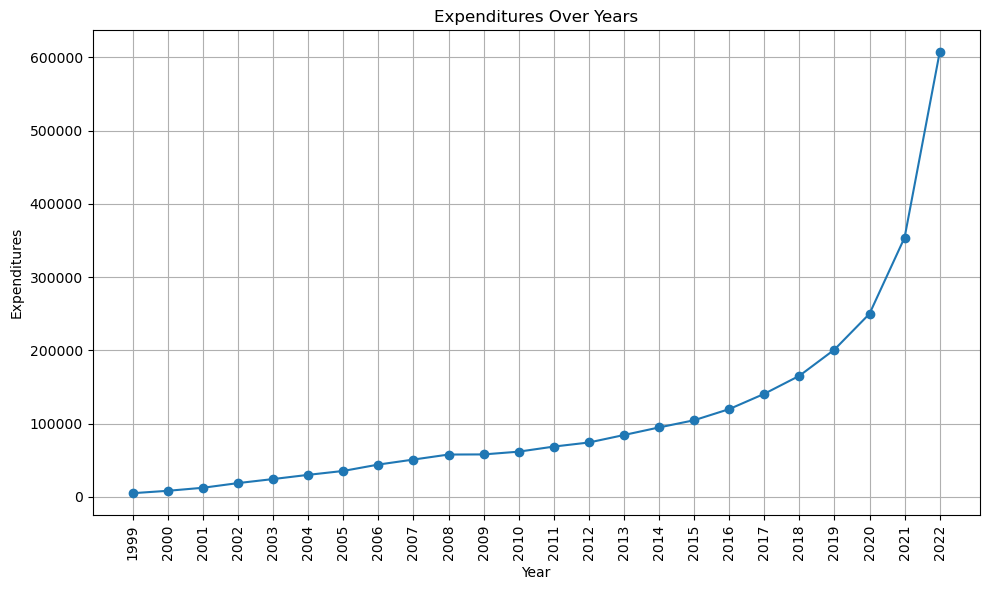

In [33]:
#Get the year and cost data
years = expenditures.columns[1:]
expenditure_data = expenditures.iloc[0,1:] 
years_int = [int(year) for year in years]

plt.figure(figsize=(10, 6))
plt.plot(years_int, expenditure_data, marker='o', linestyle='-')
plt.title('Expenditures Over Years')
plt.xlabel('Year')
plt.ylabel('Expenditures')
plt.xticks(years_int, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


**This graph shows that health expenditures increased slowly for a while, but have recently been increasing at a very high pace. With the results obtained from this graph, the impact of the Covid19 Pandemic is clearly visible. In the year of this pandemic and after this year, health expenditures have increased at a very high level, which shows that the importance given to health has increased.**

## Obese Distribution

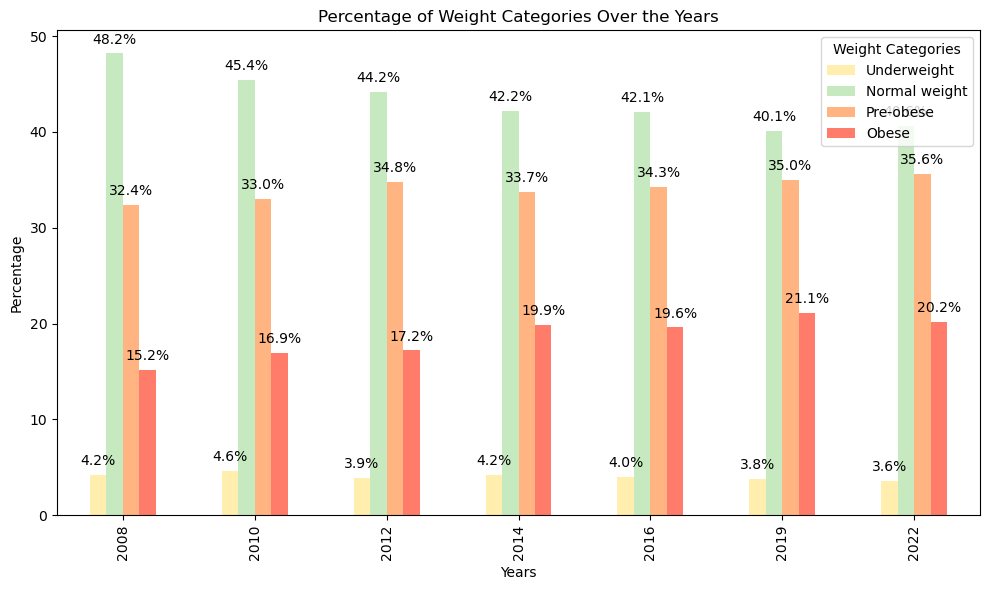

In [34]:
colors = {'Underweight': '#ffeead', 'Normal weight': '#c7e9c0', 'Pre-obese': '#ffb482', 'Obese': '#ff7b6a'}
# Plotting the bar chart
ax = body_mass.transpose().plot(kind='bar', color=[colors[col] for col in body_mass.index], figsize=(10, 6))

plt.title('Percentage of Weight Categories Over the Years')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.legend(title='Weight Categories')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

**Obesity is a health problem caused by an excessive body mass index. Contrary to efforts in raising awareness within the society, we observe an increase in healthcare expenditures related to obesity over the years. There is a general decrease in the percentage of individuals with normal weight, a tendency of overall decline in underweight individuals, and a fluctuating graph for pre-obese individuals, independent of expenditures.**

## Sickness/Healthcare Expenditure Over the Years

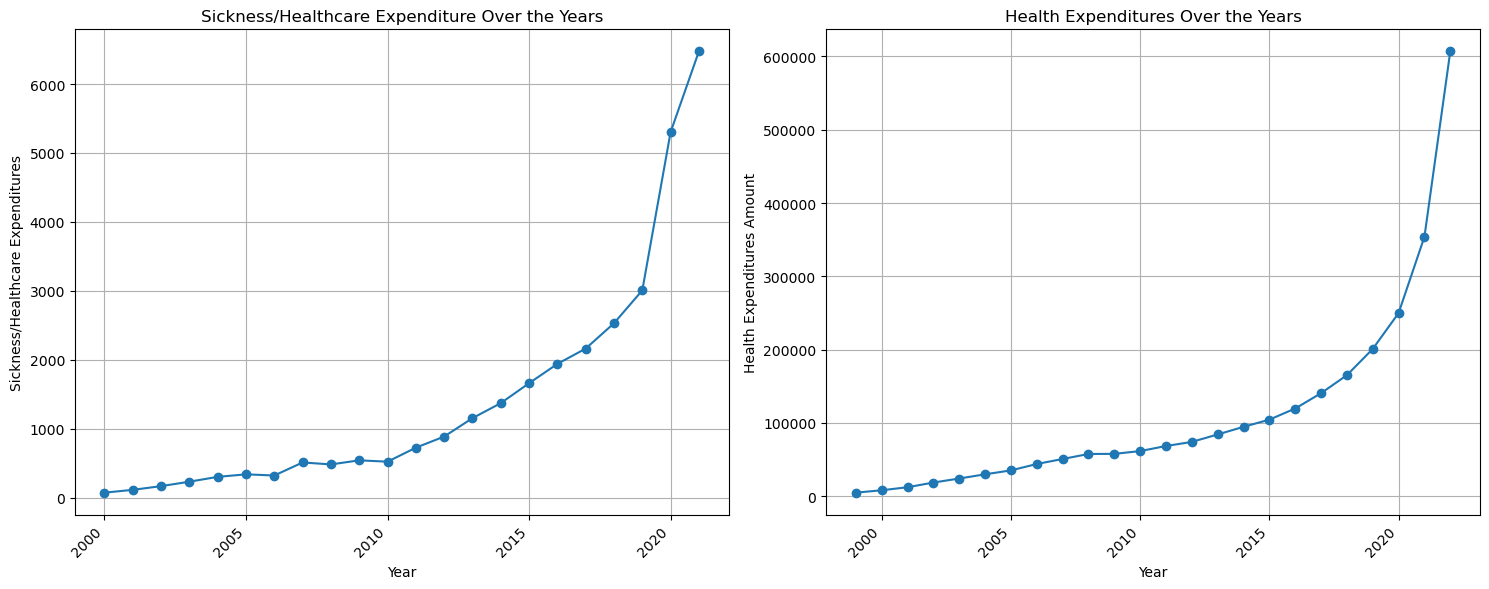

In [35]:
expenditures = pd.read_excel('saglik harcamalari ile ilgili gostergeler.xls')

target_row_index_health = 2

expenditures.columns = expenditures.iloc[target_row_index_health]

expenditures = expenditures.iloc[target_row_index_health + 1:]

expenditures = expenditures.dropna()

expenditures = expenditures.applymap(lambda x: int(x) if pd.notnull(x) and isinstance(x, (float, int)) else x)

columns_health = [int(col) if pd.notna(col) else col for col in expenditures.columns]
expenditures.columns = ['Expenditures'] + columns_health[1:]

# Plotting both graphs side by side
plt.figure(figsize=(15, 6))

# Plot for Social Assistance
plt.subplot(1, 2, 1)
plt.plot(healthcare_last.iloc[:,1], healthcare_last.iloc[:, 0], marker='o', linestyle='-')
plt.title('Sickness/Healthcare Expenditure Over the Years')
plt.xlabel('Year')
plt.ylabel('Sickness/Healthcare Expenditures')
plt.grid(True)
plt.xticks(rotation=45, ha='right')


# Plot for Health Expenditures
plt.subplot(1, 2, 2)
plt.plot(expenditures.columns[1:], expenditures.iloc[0, 1:], marker='o', linestyle='-')
plt.title('Health Expenditures Over the Years')
plt.xlabel('Year')
plt.ylabel('Health Expenditures Amount')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()



**The inference has been made that a portion of healthcare expenditures falls under the category of social assistance. As observed, over the years, expenditures in the healthcare sector and health services under the umbrella of social assistance have shown a coordinated increase.**

## Total Number of Hospital Beds Over Years

In [36]:
df1 = pd.read_excel('hastane_yatak_says.xls')

concatenated_df = pd.concat([df1.iloc[5:7, :], df1.iloc[41:62, :]], ignore_index=True)

concatenated_df= concatenated_df.dropna(axis=1)
combined_row = concatenated_df.iloc[0].astype(str) + ' ' + concatenated_df.iloc[1].astype(str)
concatenated_df = concatenated_df.drop([1, 2])
concatenated_df.loc[-1] = combined_row
concatenated_df.index = concatenated_df.index + 1
concatenated_df = concatenated_df.sort_index()
concatenated_df = concatenated_df.drop(1)

target_row_index = 0
concatenated_df.columns = concatenated_df.iloc[target_row_index]
concatenated_df = concatenated_df.iloc[target_row_index + 1:]


[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


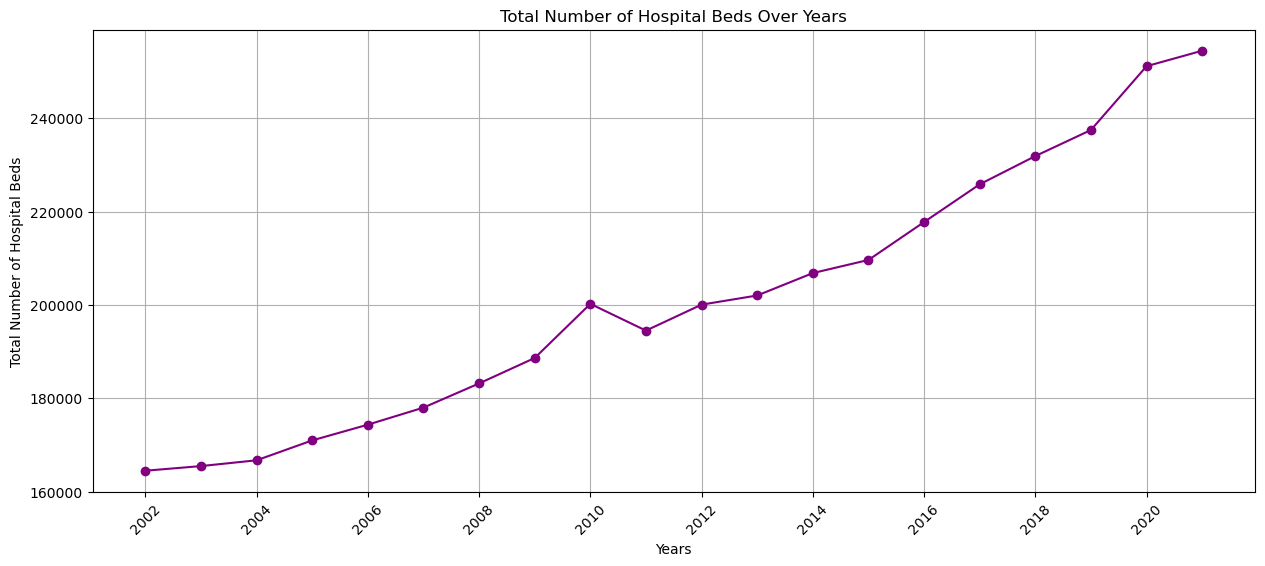

In [37]:
years_df = concatenated_df[concatenated_df.columns[0]].values

int_years = [int(year[:4]) if type(year) == str else int(year) for year in years_df]

print(int_years)

beds_df = concatenated_df[['Total number of  hospital beds']].copy()

# Plot the graph
plt.figure(figsize=(15, 6))
plt.plot(int_years, beds_df, marker='o', linestyle='-', color='purple')
plt.title('Total Number of Hospital Beds Over Years')
plt.xlabel('Years')
plt.ylabel('Total Number of Hospital Beds')
plt.xticks(range(min(int_years), max(int_years)+1, 2), rotation=45)
plt.grid(True)
plt.show()

# Health Status by Age Group Over Years

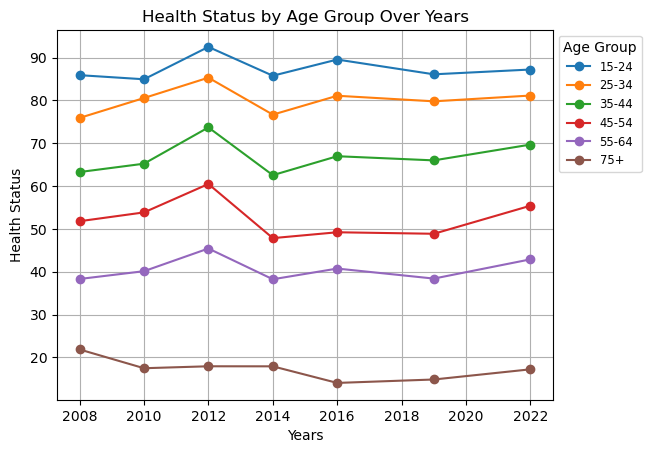

In [38]:
# Loop through each row and plot
for index, row in health_with_ages.iterrows():
    plt.plot(health_with_ages.columns[1:], row[1:], label=row['Ages'], marker='o')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Health Status')
plt.title('Health Status by Age Group Over Years')

plt.rcParams.update({'legend.fontsize': 'small'})

# Add legend to differentiate lines and change its position
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()

# Show the plot
plt.show()

**The dataset above displays the overall health status of individuals across different age groups from 2008 to 2022. This data enables us to observe how health conditions have evolved over the years. Simultaneously, it illustrates how this change varies across different age brackets, showcasing the alteration in health status among age groups over the years.**

## Hospital Difference Turkey Map

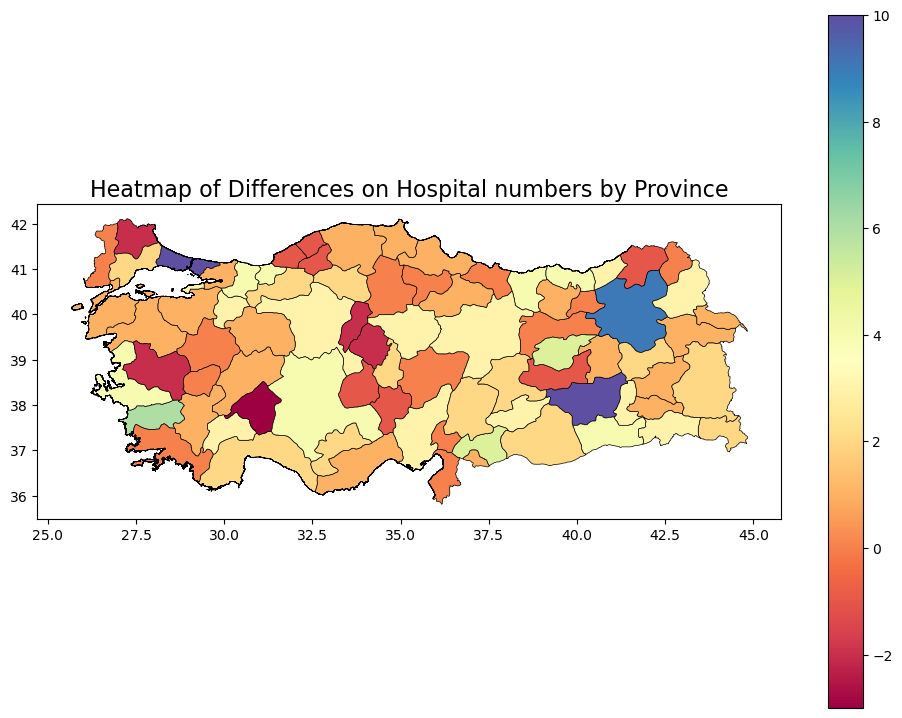

Top 5 Cities with the highest Difference:
        Cities  Difference
22  Diyarbakır          10
77    İstanbul          10
27     Erzurum           9
9        Aydın           6
29   Gaziantep           5

Lowest 5 Cities with the lowest Difference:
        Cities  Difference
48    Kırşehir          -2
50      Manisa          -2
46  Kırklareli          -2
47   Kırıkkale          -2
34     Isparta          -3


In [39]:
geoturkey = pd.merge(turkey,hospital_difference,on="Province")

fig, ax = plt.subplots(1, 1, figsize=(12, 9))  
geoturkey.plot(column="Difference", legend=True, cmap="Spectral", ax=ax,edgecolor='black', linewidth=.5)  
plt.title('Heatmap of Differences on Hospital numbers by Province', fontsize=16)  

top_cities = geoturkey.nlargest(5, 'Difference')
plt.show()


# Display'top5' and 'lowest5'
print("Top 5 Cities with the highest Difference:")
print(top5)

print("\nLowest 5 Cities with the lowest Difference:")
print(lowest5)

**We see from this table that health expenditures caused the most change in these cities, and health expenditures were mostly used to increase the number of hospitals in these cities.**


<h1><center><strong><span style="color:blue">Research Questions and Proposed tests</span></strong></center></h1>

<center><span style="color:green">Are there any correlations between years of healthy living and healthcare expenditures?</span></center>

Our hypothesis is, higher healthcare expenditures correlate positively with an increase in the years of healthy living among the population.
Regression analysis model can be used, such as linear regression, to identify relationships between healthcare expenditure (independent variable) and years of healthy living (dependent variable). Correlation analysis can also be used to determine the strength and direction of the relationship.


In [40]:
expenditures = expenditures[expenditures["Expenditures"]=="Total health expenditure (Million TRY)"]
expenditures=expenditures.drop("Expenditures",axis=1)
expenditures.reset_index(inplace=True,drop=True)
years = [2008, 2010, 2012, 2014, 2016, 2019, 2022]
selected_columns = [col for col in expenditures.columns if col in years]
expenditures = expenditures[selected_columns]
expenditures = expenditures.T
expenditures.columns = ["Expenditures"]
expenditures

,Expenditures
2008,57739
2010,61677
2012,74188
2014,94749
2016,119755
2019,201030
2022,606835


In [41]:
age_groups = ['15-24', '25-34', '35-44', '45-54', '55-64', '75+']
new_index_value = health_with_ages.iloc[:,0]
health_with_ages.index = [new_index_value]
health_with_ages=health_with_ages.drop("Ages",axis=1)
health_with_ages = health_with_ages.astype(float)

print(health_with_ages)


0           2008       2010       2012       2014       2016       2019  \
Ages                                                                      
15-24  85.882503  84.925497  92.478169  85.751447  89.533237  86.082044   
25-34  75.901548  80.545748  85.296996  76.667881  81.075248  79.774367   
35-44  63.265173  65.212058  73.682511  62.534223  66.958897  65.985747   
45-54  51.782979  53.840895  60.473288  47.833804  49.201874  48.850269   
55-64  38.294831  40.113756  45.408718  38.229355  40.725837  38.388261   
75+    21.837342  17.457172  17.911589  17.899089  14.025103  14.824537   

0           2022  
Ages              
15-24  87.201652  
25-34  81.126461  
35-44  69.676422  
45-54  55.402543  
55-64  42.879847  
75+    17.202585  


In [42]:


def findcorrelation(df):
    correlation=df.corr()
    names=df.columns.to_list()
    print(f"Correlation between {names[0]} and {names[1]}  is :",correlation.iloc[0, 1])


age_ranges = ["15-24", "25-34", "35-44", "45-54", "55-64", "75+"]

health_with_ages_list = []

for age_range in age_ranges:
    temp = health_with_ages.loc[age_range].T  
    health_with_ages_list.append(temp)

for i in health_with_ages_list:
    df = pd.merge(i,expenditures,left_index=True, right_index=True)
    findcorrelation(df)

Correlation between ('15-24',) and Expenditures  is : -0.05004678332182551
Correlation between ('25-34',) and Expenditures  is : 0.15501361821520007
Correlation between ('35-44',) and Expenditures  is : 0.3182353986717579
Correlation between ('45-54',) and Expenditures  is : 0.1591551755447171
Correlation between ('55-64',) and Expenditures  is : 0.2953336472867571
Correlation between ('75+',) and Expenditures  is : -0.19593713983472144


<center><span style="color:green">Does healthcare spending affect obesity in a positive way?</span></center>

Our hypothesis is, increased healthcare spending leads to a reduction in obesity rates due to better healthcare services and preventative programs.
Logistic regression model can be applied to predict the probability of obesity prevalence based on healthcare spending. This method can handle binary outcomes (e.g., obese vs. not obese) and model the relationship with spending.


<center><span style="color:green">How do healthcare expenditures affect social assistance programs such as disease care?</span></center>

Our hypothesis is higher healthcare expenditures improve the effectiveness and reach of social assistance programs, leading to better disease care outcomes.
A multivariate regression model could be used to analyze how different levels of healthcare spending impact various aspects of social assistance programs (e.g., program availability, quality of care).


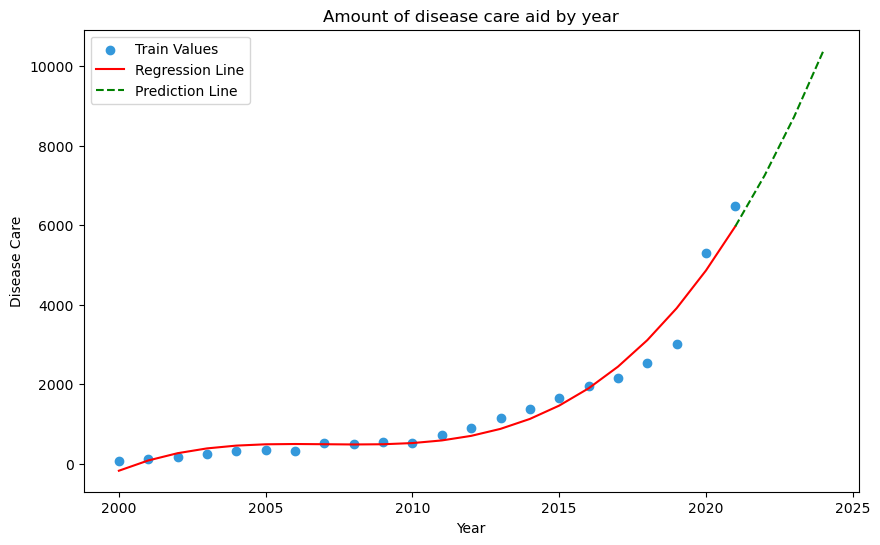

In [43]:
x = healthcare_last.iloc[:,1].values.reshape(-1,1)
y = healthcare_last.iloc[:, 0].values.reshape(-1,1)
poly = PolynomialFeatures(degree=3)

future_years = np.array(range(2021, 2025)).reshape(-1, 1)

X_train_poly = poly.fit_transform(x)
X_test_future = poly.fit_transform(future_years)  

polynomial = LinearRegression()
polynomial.fit(X_train_poly, y)

future_test_pred = polynomial.predict(X_test_future)
poly_regression = polynomial.predict(X_train_poly)


fig = plt.subplots(figsize=(10, 6))
plt.scatter(x,y, color='#3498DB')
plt.plot(x, poly_regression, color='red')
plt.plot(future_years, future_test_pred, color='green', linestyle='dashed')
plt.legend(['Train Values', 'Regression Line','Prediction Line'],prop={'size': 10},loc=2)
plt.title("Amount of disease care aid by year")
plt.xlabel('Year')
plt.ylabel("Disease Care")
plt.show()


<center><span style="color:green">Did the healthcare expenditures lead to critical change in hospital and bed capacities?</span></center>

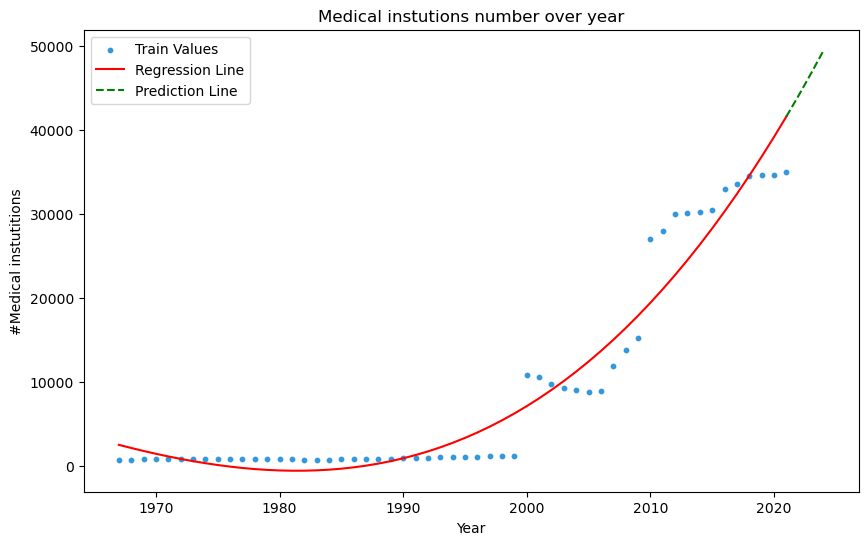

In [44]:
x = hospitalnumber.iloc[:, :-1].values
y = hospitalnumber.iloc[:, 1].values
poly = PolynomialFeatures(degree=3)
future_years = np.array(range(2021,2025)).reshape(-1, 1)

X_train_poly = poly.fit_transform(x)
X_test_future = poly.fit_transform(future_years)

polynomial = LinearRegression()
polynomial.fit(X_train_poly,y)

future_test_pred = polynomial.predict(X_test_future)
poly_regression = polynomial.predict(X_train_poly)


fig = plt.subplots(figsize=(10, 6))
plt.scatter(x,y, color='#3498DB',s=10)
plt.plot(x, poly_regression, color='red')
plt.plot(future_years, future_test_pred, color='green', linestyle='dashed')
plt.legend(['Train Values', 'Regression Line','Prediction Line'],prop={'size': 10},loc=2)
plt.title("Medical instutions number over year")
plt.xlabel('Year')
plt.ylabel("#Medical instutitions")

plt.xticks()
plt.show()

Our hypothesis is, increases in healthcare expenditures have significantly contributed to the expansion of hospital and bed capacities.
Time series analysis or interrupted time series analysis would be suitable to examine changes over time, especially if you have data pre- and post-expenditure changes.


<center><span style="color:green">Is the distribution of health expenditures by province balanced based on the changing number of hospitals?</span></center>

Our hypothesis is: The distribution of health expenditures across provinces is not balanced and does not correspond proportionally to the number of hospitals.
Cluster analysis could be used to group provinces based on similarities in expenditure and hospital numbers, identifying patterns and imbalances in distribution.


<center><span style="color:green">Has the pandemic created a crucial change in health expenditures?</span></center>

Our hypothesis is: The onset of the pandemic has led to a significant increase in health expenditures due to increased demand for medical services and resources.
Interrupted time series analysis or a difference-in-differences approach could be effective in assessing the impact of the pandemic as an 'interruption' or 'treatment' on healthcare spending trends.


<h1><center><strong><span style="color:blue">Potential products or how to convert this project to a service or product
</span></strong></center></h1>


"Focused Expenditure Prediction & Optimization": This service uses advanced machine learning algorithms to analyze current healthcare expenditure trends, identifying areas of high spending and their impacts. It then forecasts future expenditure patterns and effects, focusing on key areas like hospital infrastructure, obesity management, or public health programs. Based on these predictions, the service recommends the most efficient allocation of resources and strategies to optimize healthcare outcomes, guiding decision-makers towards more effective and targeted health investments. This approach aims to maximize the impact of healthcare spending by aligning it with the most critical health needs and trends. 

To develop the "Focused Expenditure Prediction & Optimization" service, machine learning models will be trained using historical healthcare data, identifying key expenditure areas and their impacts. These models will forecast future spending patterns and assess potential outcomes of different health indicators. Optimization algorithms will then recommend efficient resource allocations, focusing on maximizing health impacts. The system will incorporate continuous learning, regularly updating with new data to refine predictions and maintain accuracy in its recommendations.



<h1><center><strong><span style="color:blue">Any issues related to data engineering</span></strong></center></h1>

<center>1. Machine Learning Model Maintenance: </center>
 <br>
 For our project, Machine Learning Model Maintenance entails regularly updating and retraining the predictive models with new healthcare data to adapt to changing health trends and policies, ensuring ongoing accuracy and relevance in forecasting healthcare expenditures and optimization recommendations.
<br>
<br>
<center>2.	Scalability:<center> 
<br>
The system should be scalable to handle increasing amounts of data and users. This involves using scalable architectures like cloud services and designing databases that can grow without performance degradation.
<br>
<br>
<center>3.	Data Quality and Consistency:<center> 
<br>
Ensuring high-quality, accurate, and consistent data is crucial. This involves cleaning, normalizing, and standardizing data from diverse sources to avoid issues like missing values, duplicates, or inconsistent formats.


<h1><center><strong><span style="color:blue">Any issues related ethics</span></strong></center></h1>

In the project, data utilization is legally unrestricted and can be leveraged as long as the government agrees to share it, posing no current issues in terms of access permissions or ethics.

Our dataset, which includes the number of hospitals, encompasses data from various institutions like university hospitals, state hospitals, and private hospitals. Currently, the project utilizes only state hospital data. However, if the project is expanded to include data from private hospitals, permission may need to be obtained from these private institutions for data access.



<h1><center><strong><span style="color:blue">Conclusion</span></strong></center></h1>

### In conclusion, our project, "Health Status & Expenditures," has shed light on the intricate relationships between healthcare expenditures and key factors such as the number of hospitals by province, obesity rates, hospital bed capacities, social assistance programs, and individual health status. We have observed that the relationships among certain datasets align with our expectations, paving the way for accurate predictions through machine learning algorithms.